## Exercise 1: $k$-NN Fundamentals (20%)


Here we will try classification of the famous handwritten digits data set. 

This data set exists in many forms; we will use the one bundled in `sklearn.datasets`. We will also use `sklearn` for classification.

Load the data:

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import random
%matplotlib inline

digits = datasets.load_digits()

In [3]:
X = digits['data']# this is the data with each 8x8 image "flattened" into a length-64 vector.
print(X)
#print(digits)
Y = digits['target'] # these are the labels (0-9).
print(Y)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]


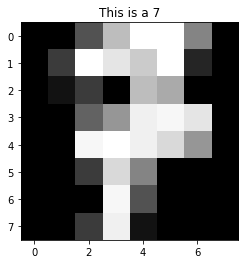

In [5]:
idx = random.randint(0, digits['images'].shape[0]-1) 
plt.imshow(digits['images'][idx], cmap='Greys_r')
plt.title('This is a %d' % digits['target'][idx])

In [4]:
#1a Fundamentals 
print(len(X[0]))
len(X)
print(X)
import numpy as np
dis1=np.linalg.norm(X[0]-X[1])
dis2=np.linalg.norm(X[0]-X[2])
print(dis1)
print(dis2)

64
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
59.5566956773
54.1294744109


### 1(a) Fundamentals


1. How many features are there, and what are they?
Answer: There are 1797 observations in the dataframe. In each row of observation, there are 64 features representing the pixels with range from 0 to 16. The combination of 64 features stand for a certain number from 0 to 9.
2. Which is closer to element 0 (`X[0]`) -- element 1 (`X[1]`) or element 2 (`X[2]`)? Report the two distances (Euclidean).
Answer: We have here the distance between X[0] and X[1], and the other one between X[0] and X[2]. Apparently, X[2] is closer to X[0].
3. Using the above information, if only elements 1 and 2 are used in a $k$-NN classifier with $k=1$, what would element 0 be classified as, and why?
Answer: When k=1, the kNN classfier turns to the 1-nearest neighbor classfier. This classifier assigns a point x to the class of its closest neighbour in the space. If only element 1 and 2 are used in the classifier, then element 0 would be classified as the array of element 2 since the nearer neighbor of element 0 between the two is element 2.

[0 1 2 ..., 8 9 8]
0.985531441291
5
69
129
170
242
378
492
547
683
746
794
890
891
899
905
1038
1100
1118
1361
1553
1582
1658
1660
1662
1765
1790
5
9


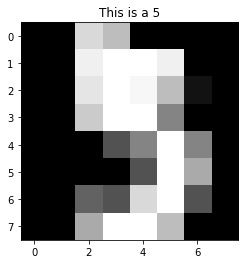

In [5]:
#1b Investigating error
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, Y)
pred = knn.predict(X)
print(pred)
knn.predict_proba(X)
print(knn.score(X, Y, sample_weight=None))
#get wrong predictions' index
for i in range(len(Y)):
    if (Y[i]!= pred[i]):
        print(i)
print(Y[5])
print(pred[5])
##plot for 5th element
#idx = random.randint(0, digits['images'].shape[0]-1) 
plt.imshow(digits['images'][5], cmap='Greys_r')
plt.title('This is a %d' % digits['target'][5])

### 1(b) Investigating error

You'll be using the scikit-learn implementation of the $k$-NN classifier. Documentation is available at http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Using `k=10`, fit a $k$-NN classifier using `X` and `Y` using all of the data as your training data. Obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? This is called the _error rate_. 
Answer: The code shown in the previous cell shows the process of the prediction. The accuracy score is returned. Approximately 98.55% of the predictions are correct. Therefore, nearly 1.45% of the predictions are incorrect.
2. Choose one case that was not predicted correctly. What was predicted, and what is the correct label? Plot the image, and comment on why you think the classifier made a mistake. 
Answer: As printed in the results of the previous cell, the fifth element is not correctly predicted. The predicted value is 9 for the fifth element, while the correct label is 5. The image is already plotted in the previous coding cell. The classifier made a mistake because the value of K might be a little bit high. KNN with high value of k averages more points into each prediction and therefore is more resilient to outliers. The difference between the real value and prediction isn't too big, however, since the recognitions of 5 and 9 are similar. Large k value gave low variance but increased bias. That might be the reason why the classifier made mistakes.


In [6]:
#1c One nearest neighbor error
import sklearn
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, Y)
pred1 = knn1.predict(X)
print(pred1)
knn1.predict_proba(X)
print(knn1.score(X, Y, sample_weight=None))
print(sklearn.metrics.accuracy_score(Y,pred1,sample_weight=None))

[0 1 2 ..., 8 9 8]
1.0
1.0


### 1(c) One Nearest Neighbour error

Now fit the classifier using `k=1`, using all of your data as training data, and again obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? Briefly explain why this error rate is achieved (in one or two sentences; think about how the $k$-NN algorithm works).

Answer: As shown above in the outcomes,we can conclude that the error rate is 0. 0% of the predictions is incorrect. When k=1, this classifier assigns a point x to the class of its closest neighbour in the feature space. Therefore, for this particular data frame, the nearest neighbor of a point x can be the best prediction of it and thus the kNN gave the aggregation of accurate predictions.   

2. With the above error rate in mind, if I give you a new handwritten digit (not in the data set), will the classifier _for sure_ predict the label correctly? Briefly explain why or why not.

Answer: Not necessarily. In this first-nearest neighbor classifier, the value of k is really small. A small value of k implies that noise will have a higher influence on the result. Therefore, if the new handwritten digit gives features that are far different from the other observations, the prediction might not be correct since small k value gave high variance. But if the new given digit has features that are relatively close to at least to one of the observations in the data frame, the probability that the prediction will be the same as the true value would be high.

[[  0.   0.   4. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   2.   0.   0.]
 [  0.   0.  11. ...,  15.   0.   0.]
 ..., 
 [  0.   0.   5. ...,  16.  11.   2.]
 [  0.   0.   1. ...,   0.   0.   0.]
 [  0.   0.   7. ...,   0.   0.   0.]]


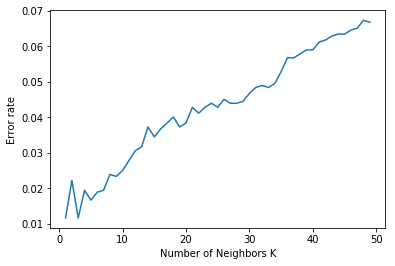

[0.011686143572620988, 0.022259321090706718, 0.011686143572620988, 0.019476905954368351, 0.016694490818030094, 0.018920422927100722, 0.019476905954368351, 0.023928770172509717, 0.023372287145242088, 0.025041736227045086, 0.027824151363383454, 0.03060656649972171, 0.031719532554257079, 0.037284362826933815, 0.034501947690595447, 0.036727879799666074, 0.038397328881469073, 0.040066777963272071, 0.037284362826933815, 0.038397328881469073, 0.042849193099610439, 0.04117974401780744, 0.042849193099610439, 0.043962159154145808, 0.042849193099610439, 0.045075125208681177, 0.043962159154145808, 0.043962159154145808, 0.044518642181413437, 0.046744574290484175, 0.048414023372287174, 0.048970506399554803, 0.048414023372287174, 0.049526989426822432, 0.05286588759042854, 0.056761268781302165, 0.056761268781302165, 0.057874234835837535, 0.058987200890372793, 0.058987200890372793, 0.061213132999443531, 0.06176961602671116, 0.06288258208124653, 0.063439065108514159, 0.063439065108514159, 0.064552031163

In [15]:
##2a influence of k
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
print(X_train)
len(X_train)
myList = list(range(1,50))
# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred=knn.predict(X)
    cv_scores.append(sklearn.metrics.accuracy_score(Y,pred,sample_weight=None))
MSE = [1 - x for x in cv_scores]
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error rate')
plt.show()
print(MSE)

## Exercise 2: Investigating $k$-NN Error (15%)

__Note__: It's always a good idea to randomly shuffle the data before splitting, in case the data comes ordered in some way. (For example, if they are ordered by label, then your training set will be all the digits 0-4, and your test set all the digits 5-9, which would be bad... you might end up with 100% error!!) To shuffle your data, you can use [`numpy.random.shuffle`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html).

For various values of $k$, fit (a.k.a. _train_) a classifier using the training data. Use that classifier to obtain an error rate when predicting on both the training and test sets, for each $k$. How do the training error and test error change with $k$? Make a plot to show the trends, and briefly comment on the insights that this plot yields.

Answer:Usually, low values of k gave low bias and high variance while high values of k gave high bias but low variance. Also, higher values of k produce less complex model. The error rate for each of the fifty values of k are printed in the cell above. A plot with error rate vs. k value is also shown. Here for this particular dataset, we can observe that the training error and test errors increase in general when the k value increases. However, in a certain range, the error rate goes down first and then goes up again as k value increases. Therefore, for this dataset, kNN with smaller k values gave better prediction. This is different from a normal situation since the middle value of k is normally the best. From the plot and the error rate list, we can also observe that the best k value for this dataset is 1 or 3 as they gave an error rate of nearly 1.2%.

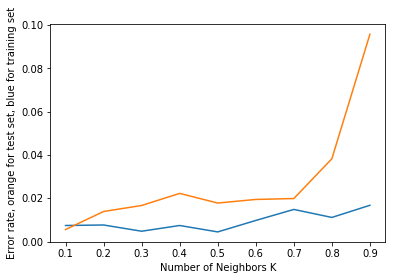

In [18]:
#2b the influence of data partition
lst=list(np.arange(0.1, 1.0, 0.1))
type(lst)
# empty list that will hold cv scores
cv_scores = []
cv_scores1= []
# perform 10-fold cross validation
for i in lst:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=i)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, Y_train)
    pred=knn.predict(X_train)
    cv_scores.append(sklearn.metrics.accuracy_score(Y_train,pred,sample_weight=None))
    pred1=knn.predict(X_test)
    cv_scores1.append(sklearn.metrics.accuracy_score(Y_test,pred1,sample_weight=None))
MSE = [1 - x for x in cv_scores]
MSE1 = [1 - x for x in cv_scores1]
# plot misclassification error vs k
plt.plot(lst, MSE)
plt.plot(lst, MSE1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error rate, orange for test set, blue for training set')
plt.show()

### 2(b) The influence of data partition

rubric={reasoning:5}

Now, choose your favourite value of $k$, but vary the proportion of data reserved for the training set, again obtaining training and test error rates for each partition of the data. Plot training and test error (on the same axes) vs. the proportion of training examples. Briefly comment on the insights that this plot yields.

Answer: I chose 3 as the k value here. From the plot shown above, we can observe an increasing trend. The orange line stands for the test error rate and the blue line represents the training error rate. As test set becomes larger and training set turns smaller, the error rates for both training set and test set seem to be increasing. The partition of training set doesn't affect the training error rate much, however, since the knn is fit using training set. The partition affects the test error rate more than the training error rate. Also, the test error rate is the biggest when the test set size is the largest and vice versa.

## Exercise 3: Loess (50%)

All the following questions in exercise 3  will be coded in R.However, the written part will be included here in this ipynb file since it's easier to read here. 

### 3(a) Scaling

Estimate the standard deviations of both (numeric) predictors. Is scaling your data justified? Does your decision also apply to $k$-NN, or is scaling only relevant for loess? If scaling is justified, proceed with scaling by subtracting the mean, then dividing by standard deviation (for each numeric predictor). 

Answer: After deleting the rows where there is NA in age and Fare, a log transformation is conducted here in order to gather the values of fare and lower the variance. The standard deviation of age is estimated to be 14.5265. The standard deviation of age is estimated to be 0.9884. 
Scaling could be necessary and very useful here. Since the purpose of scaling is to unite the different units that different predictors might have. In this dataset, age and fare have different units. Therefore, scaling is justified here. This also applier to kNN since kNN also needs standardized predictors to calculate the distance. Otherwise, the distance isn't weighed equally. Scaling is conducted by subtracting the mean, then dividing by standard deviation.


### 3(b) Regression

Fit a loess model to the training data for various values of the bandwidth parameter. Plot the mean squared error (MSE) on the training and test sets, and plot these across bandwidth. How does the training error curve differ from the training error curve, and why? From this plot, using the "validation set approach" for choosing hyperparameters, what bandwidth is appropriate?

Answer: I first subset the female and male datasets based on Sex column. The training set is 60% of the dataset.
For female subset: The plot of the mean squared error (MSE) on the training and test sets across bandwidth is shown in the R output. The training error curve is lower than the out-of sample error. It's reasonable that training error is smaller when small r is used since the loess function is fit using the training data and thus would fit the training set better than validation set. Sometimes the training error is always smaller than the validation error and sometimes not. Also, as r increases, the training error seems to increase as well, while the validation error seems to decrease until a certain level when r is really big. 
Using the 'validation set approach' for choosing bandwidth, 0.8 seems to be the most appropriate since it generates the smallest validation error.
For male subset: All the features and the trends of the training error curve and validation error curve are very similar to those of the female subset. Except that 0.9 seems to be the most appropriate bandwidth here in this subset since it generates the smallest validation error.

### 3(c) Classification

Like you just did, fit a loess model to the training data for various values of the bandwidth parameter, but then add a classification step: predict survival if the probability of survival is greater than 0.5. Plot the error rate on the training and test sets, and plot these across bandwidth. How does the training error curve differ from the training error curve, and why? From this plot, using the "validation set approach" for choosing hyperparameters, what bandwidth is appropriate? Do you get similar results when you considered the MSE in the regression case above?

Answer: The training set is 60% of the titanic_train dataset.
For female subset: The plot of the error rate on the training and test sets across bandwidth is shown in the R output. The training error curve is lower than the out-of sample error before a certain point. It's reasonable that training error is smaller when small r is used since the loess function is fit using the training data and thus would fit the training set better than validation set. Sometimes the training error is always smaller than the validation error and sometimes not. Also, generally as r increases, the training error seems to increase as well, while the validation error seems to decrease until a certain level when r is really big. 
Using the 'validation set approach' for choosing bandwidth, 1.0 seems to be the most appropriate since it generates the smallest validation error.
For male subset: All the features and the trends of the training error curve and validation error curve are very similar to those of the female subset. Still, 1.0 seems to be the most appropriate bandwidth here in this subset since it generates the smallest validation error.
I got very similar results compared to when the MSE is considered in the previous section. The only minor change is the optimal value of r. However, the difference is not really significant. R value of 0.8-1.0 generally gives the smallest validation error in either case.

### 3(d) $k$-NN

Try the above classification exercise, but using $k$-NN. Plot the error rate on the training and test sets, and plot these across $k$. How does the training error curve differ from the training error curve, and why? From this plot, using the "validation set approach" for choosing hyperparameters, what $k$ is appropriate? How does the error compare with loess? Which would you choose, loess or $k$-NN?

Answer: The training set is 60% of the titanic_train dataset.
For female subset: The plot of the error rate on the training and test sets across k value is shown in the R output. The training error curve is lower than the out-of sample error before a certain point when the training error exceeds the validation error. It's reasonable that training error is smaller when small k is used since the loess function is fit using the training data and thus would fit the training set better than validation set. Sometimes the training error is always smaller than the validation error and sometimes not. Also, generally as k increases, the training error seems to increase as well, while the validation error seems to decrease until a certain level when k is really big. 
Using the 'validation set approach' for choosing k, 20 seems to be the most appropriate since it generates the smallest validation error.
For male subset: All the features and the trends of the training error curve and validation error curve are very similar to those of the female subset except that the validation error turns to be increasing at a certain point. 15 seems to be the most appropriate k here in this subset since it generates the smallest validation error.
Compared to loess, the error rate is generally lower with kNN for both subsets. Therefore, I would choose kNN to predict the survival rate here as kNN provides lower error rate on average.

## Exercise 4: Concepts (10%)

### 4(a) Missing Prediction

It's possible that loess won't predict anything for a certain observation on the test set. In what situation will this happen, and why? Could this also be the case for $k$-NN?

Answer: If there is no observations in a certain band, 1-2 for instance if r=1, it's possible that loess won't predict anything for a certain observation on the test set. However, this won't be the case for kNN since kNN always has a choice to average the observations that are nearby even if there might be outliers for certain observations and the predictions would have high variance when k is small.

### 4(b) Fundamental tradeoff

How do the bandwidth and $k$ hyperparameters in loess and $k$-NN influence the bias/variance tradeoff? Use two brief sentences.

Answer: Large values of k or bandwidth will resullt in predictions with low variance, but high bias. And small values of k or bandwith will result in predictions with high variance, but low bias.